Some toy Data:

In [1]:
import numpy
import matplotlib.pyplot as plt

# Create 1D Gaussian toy data.
numpy.random.seed(1)  # set random seed
# Draw 10 values from unit Gaussian.
Data = numpy.random.normal(0.0, 1.0, 10)

Our model is a straight line with true parameters offset a = 0.0 and slope b = 0.0. Fit for a and b using a brute-force grid:

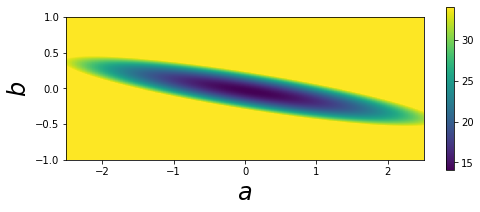

In [3]:
# Range of parameter a.
a_min = -2.5
a_max =  2.5
# Range of parameter b.
b_min = -1.0
b_max =  1.0
# Number of steps of grid.
Steps = 100
# Allocate grid as matrix.
Grid  = numpy.zeros([Steps,Steps])

# Try all parameter combinations.
for s1 in range(Steps):
    for s2 in range(Steps):
        # Current parameter combination.
        a = a_min + (a_max - a_min)*float(s1)/float(Steps-1)
        b = b_min + (b_max - b_min)*float(s2)/float(Steps-1)

        # Evaluate chi-squared.
        chi2 = 0.0
        for n in range(len(Data)):
            # Use index n as pseudo-position
            residual = (Data[n] - a - n*b)
            chi2     = chi2 + residual*residual
        Grid[Steps-1-s2,s1] = chi2
plt.figure(1, figsize=(8,3))
mini  = numpy.min(Grid)  # minimal value of chi2
image = plt.imshow(Grid, vmin=mini, vmax=mini+20.0,
                         extent=[a_min,a_max,b_min,b_max])
plt.colorbar(image)
plt.xlabel(r'$a$', fontsize=24)
plt.ylabel(r'$b$', fontsize=24)
plt.savefig('example-chi2-manifold.png')
plt.show()

In [11]:
import numpy as np
import scipy.stats as stat

expected = 2*np.arange(0,10)+3
data= expected+Data

stat.chisquare(data,expected)

Power_divergenceResult(statistic=1.8430316445872, pvalue=0.993713507770012)

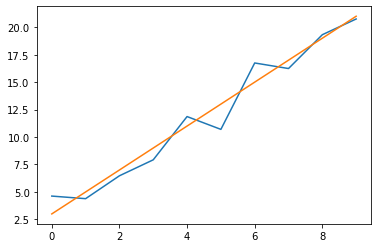

In [10]:
plt.plot(data)
plt.plot(2*np.arange(0,10)+3)